# Disease Spreading

## Mathematical Modelling
An infectious disease can be modelled mathematically in order to describe or study its behaviour. The aim of the modelling is to project how the infectious disease will progress with time and if the likely outcome turns out to be epidemic, to what extent will this happen? This will help inform and implement any necessary public health interventions before the spread becomes uncontrollable.

Models work with basic assumptions and collected data and together with the mathematics, epidemiological parameters such as the basic reproductive ratio could be computed for the specific disease type. The effectiveness of different interventions such as social distancing or mass vaccination programmes (as seen in the recent Covid-19 pandemic) could then be measured when the modelling is modified based on such interventions and with new data collected. 

In summary, the modelling of infectious diseases is a tool that has been used to study the mechanisms by which diseases spread, to predict the future course of an outbreak and to evaluate strategies to control an epidemic.

## The SIR Model
Compartmental models such as SIR or SEIS are general modelling technique for studying infectious diseases. The population is assigned to compartments with labels (for example, S, E, I, R denotes Susceptible, Exposed, Infectious, Recovered respectively) where the order of the labels denotes the flow pattern of how the disease spread proceeds). People may progress between compartments.

In the SIR model, there are only three compartments in a fixed population:

- $S(t)$ (susceptible) represents individuals of the population not yet infected with the disease at time $t$, or those susceptible in the population.
- $I(t)$ (infectious) represents individuals of the population who have been infected with the disease and are capable of infecting others in the susceptible group.
- $R(t)$ represents individuals of the population who have been infected and then protected against the disease. They will not be infected again or are not capable of infecting others.

The "normalised" SIR formulation consists of the following set of nonlinear differential equations: 

$$ \frac{dS'}{dt} = -rR_{0}S'I' $$ 
$$ \frac{dI'}{dt} = rI'(R_{0}S'-1) $$ 
$$ \frac{dR'}{dt} = rI' $$ 

$r$ is the rate of recovery and $R_{0}$ is the basic reproductive number or ratio and is dependent on the parameter for infectivity ($R_{0} = \frac{\beta N}{r}$ where $N$ is the total population assumed to be a constant). 

The set of nonlinear differential equations can be solved in Python by calling the **odeint()** function.

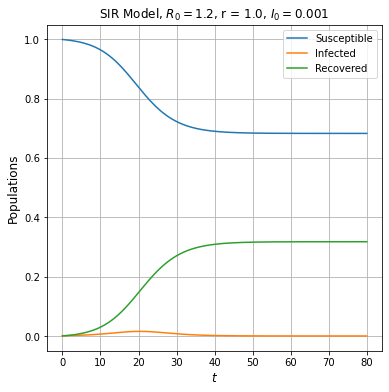

In [1]:
# Modeling the SIR with R0 = 0.9

#%reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# U will return both S and I 
def model(U, t):
    s, i = U[0], U[1]     
    return [-r*R0*s*i, r*i*(R0*s-1)]
    # return [ -r*R0*U[0]*U[1], r*U[1]*(R0*U[0]-1) ] 

tmax = 80
ticks = 50*tmax
t = np.linspace(0, tmax, ticks)

R0 = 1.2   # Basic reproductive ratio
r = 1.0    # Rate of recovery 

# Initial conditions; choose a very small infected fraction
U0 = [0.999, 0.001]

Uns = odeint(model, U0, t)

S = Uns[:,0]
I = Uns[:,1]
R = 1 - S - I

plt.figure(figsize=(6,6))
plt.plot(t,S,label='Susceptible')
plt.plot(t,I,label='Infected')
plt.plot(t,R,label='Recovered')
plt.title("SIR Model, $R_0 = $" + str(R0) + ", r = " + str(r) + ", $I_0 = $" + str(U0[1]))
plt.xlabel("$t$", fontsize=12)
plt.ylabel("Populations", fontsize=12) 
plt.legend()
plt.grid()
plt.show()